In [45]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('C:/Users/Lasse/Desktop/LUH#/AI in Education Hackaton/bias-analysis-students/data/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [46]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [47]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
male_df = df[df['gender'] == 'male']
female_df = df[df['gender']=='female']

male_size = male_df.shape[0]
female_size = female_df.shape[0]

print(f"Number of rows in male_df: {male_size}")
print(f"Number of rows in female_df: {female_size}")

male_A_size = df[df['race/ethnicity'] == 'group A'].shape[0]
male_B_size = df[df['race/ethnicity'] == 'group B'].shape[0]
male_C_size = df[df['race/ethnicity'] == 'group C'].shape[0]
male_D_size = df[df['race/ethnicity'] == 'group D'].shape[0]
male_E_size = df[df['race/ethnicity'] == 'group E'].shape[0]

print(f"Number of rows in male_df for race/ethnicity 'A': {male_A_size}")
print(f"Number of rows in male_df for race/ethnicity 'B': {male_B_size}")
print(f"Number of rows in male_df for race/ethnicity 'C': {male_C_size}")
print(f"Number of rows in male_df for race/ethnicity 'D': {male_D_size}")
print(f"Number of rows in male_df for race/ethnicity 'E': {male_E_size}")


Number of rows in male_df: 508
Number of rows in female_df: 492
Number of rows in male_df for race/ethnicity 'A': 79
Number of rows in male_df for race/ethnicity 'B': 198
Number of rows in male_df for race/ethnicity 'C': 323
Number of rows in male_df for race/ethnicity 'D': 257
Number of rows in male_df for race/ethnicity 'E': 143


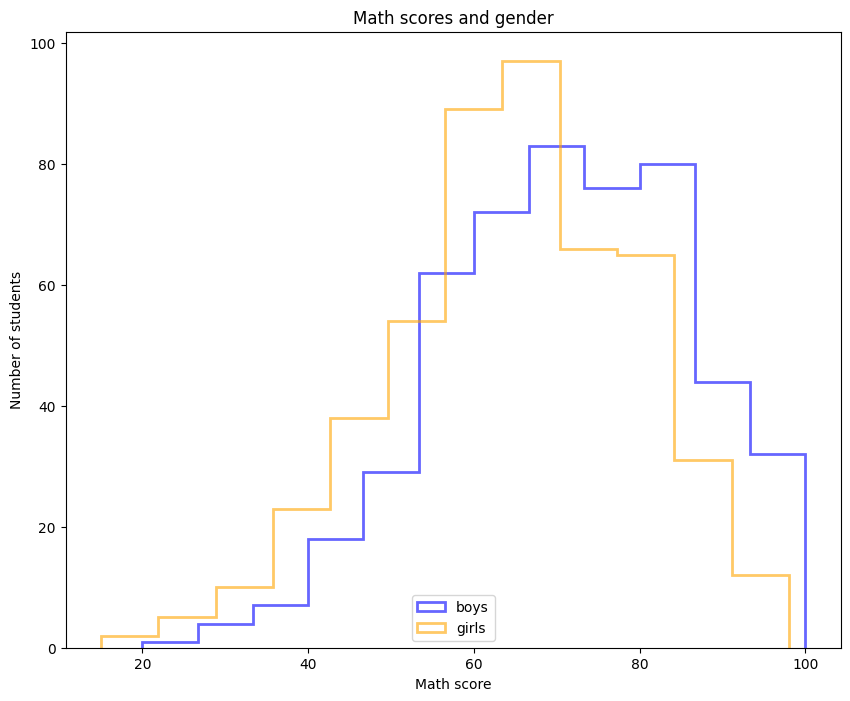

In [50]:
plt.figure(figsize=(10, 8))
plt.hist(x=male_df['math score'], bins=12, density=False, alpha=0.6, color='blue', histtype = 'step', linewidth = 2) 

plt.hist(x=female_df['math score'], bins=12, density=False, alpha=0.6, color='orange', histtype = 'step', linewidth = 2)
legend_labels = ["boys", "girls"]
plt.legend(legend_labels, loc=8)
plt.title('Math scores and gender')
plt.xlabel('Math score')
plt.ylabel('Number of students')
plt.savefig('my_histogram.png')
plt.show()

In [51]:
group_stats = df.groupby('gender')['math score'].describe()
print(group_stats)

        count      mean        std   min   25%   50%   75%    max
gender                                                           
female  492.0  64.77439  15.079150  15.0  55.0  65.0  75.0   98.0
male    508.0  70.75000  14.847499  20.0  60.0  72.0  82.0  100.0


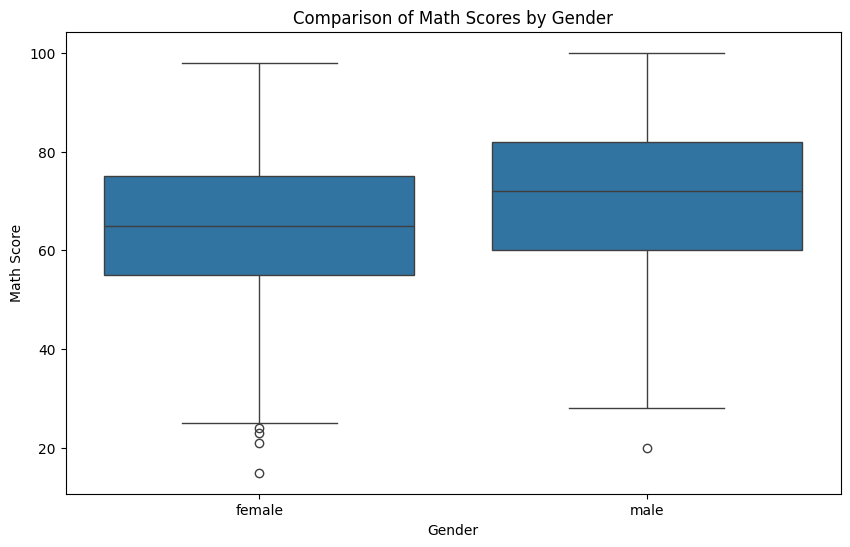

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Comparison of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

In [53]:
female_race_stats = female_df.groupby('race/ethnicity')['math score'].describe()
print(female_race_stats)

                count       mean        std   min   25%   50%   75%   max
race/ethnicity                                                           
group A          41.0  62.951220  10.674622  34.0  57.0  62.0  70.0  83.0
group B         112.0  62.267857  14.691410  27.0  52.0  62.0  73.0  92.0
group C         151.0  63.019868  14.913292  21.0  54.0  65.0  72.5  92.0
group D         118.0  63.838983  15.220303  15.0  54.5  65.0  74.0  94.0
group E          70.0  75.214286  14.052585  41.0  65.0  78.0  86.0  98.0


In [54]:
male_race_stats = male_df.groupby('race/ethnicity')['math score'].describe()
print(male_race_stats)

                count       mean        std   min    25%   50%   75%    max
race/ethnicity                                                             
group A          38.0  68.657895  13.703967  37.0  59.00  69.5  79.0   96.0
group B          86.0  66.418605  14.230427  33.0  56.25  66.0  76.0  100.0
group C         172.0  67.697674  13.971625  20.0  59.00  68.0  77.0   95.0
group D         139.0  73.158273  15.036313  35.0  63.00  73.0  82.0  100.0
group E          73.0  79.547945  13.532924  43.0  72.00  82.0  89.0  100.0


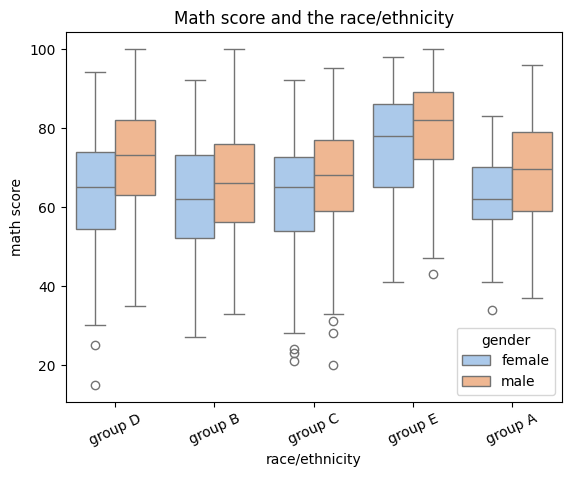

In [55]:
sns.boxplot(x = "race/ethnicity", y = "math score", hue = "gender", palette = "pastel", data = df)
plt.xticks(rotation=25)
plt.title('Math score and the race/ethnicity')
plt.show()

In [56]:
education_order = [
    "master's degree",
    "bachelor's degree",
    "associate's degree",
    "some college",
    "high school",
    "some high school"
]

df['parental level of education'] = pd.Categorical(
    df['parental level of education'],
    categories=education_order,
    ordered=True
)

df = df.sort_values(by='parental level of education')

parents_stats = df.groupby('parental level of education')['math score'].describe()
print(parents_stats)


                             count       mean        std   min   25%   50%  \
parental level of education                                                  
master's degree               75.0  71.026667  14.189807  32.0  62.0  70.0   
bachelor's degree            105.0  69.866667  14.262017  39.0  61.0  68.0   
associate's degree           204.0  70.348039  14.821813  28.0  61.0  72.0   
some college                 224.0  68.642857  14.552738  27.0  59.0  70.0   
high school                  215.0  65.381395  15.971459  15.0  55.0  66.0   
some high school             177.0  64.197740  15.739730  23.0  54.0  64.0   

                              75%    max  
parental level of education               
master's degree              82.0  100.0  
bachelor's degree            81.0  100.0  
associate's degree           82.0  100.0  
some college                 80.0  100.0  
high school                  77.5  100.0  
some high school             74.0  100.0  


C:\Users\Lasse\AppData\Local\Temp\ipykernel_15436\2796193884.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parents_stats = df.groupby('parental level of education')['math score'].describe()


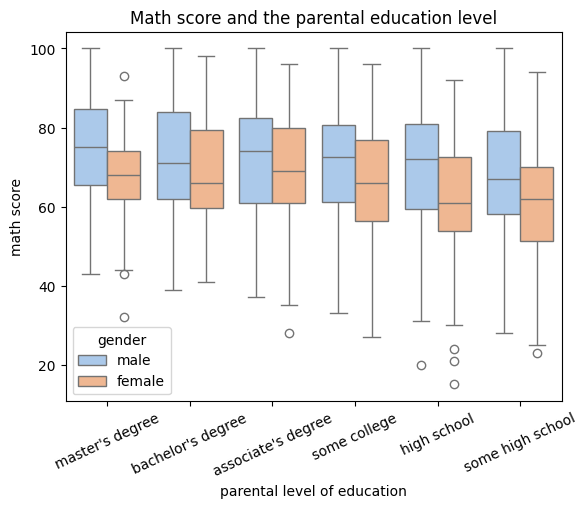

In [57]:
sns.boxplot(x = "parental level of education", y = "math score", hue = "gender", palette = "pastel", data = df)
plt.xticks(rotation=25)
plt.title('Math score and the parental education level')
plt.show()

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df.rename(columns={'race/ethnicity': 'race'}, inplace=True)
df.rename(columns={'parental level of education': 'parents_education'}, inplace=True)

model = ols('Q("math score") ~ C(gender) + C(parents_education) + C(race)', data=df).fit()
ancova_table = sm.stats.anova_lm(model, typ=2)

print(ancova_table)

                             sum_sq     df          F        PR(>F)
C(gender)               8092.095570    1.0  40.159076  3.551026e-10
C(parents_education)    6351.401902    5.0   6.304088  9.051222e-06
C(race)                18155.689375    4.0  22.525553  7.968034e-18
Residual              199284.528747  989.0        NaN           NaN


F (F-statistic): This is the ratio of the mean square deviations explained by the variable to the mean square deviations explained by the residuals. It measures the impact of each independent variable relative to the variability within the groups not explained by the models.

PR(>F) (p-value): This indicates the probability that you would get the observed F value if the hypothesis that there is no difference between the groups is true. A lower p-value indicates stronger evidence against the null hypothesis (that there is no effect).

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [81]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes
    elif df[i].dtype == "category":
        df[i]=df[i].astype('category').cat.codes

In [82]:
# Split the dataset by gender
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 0]

# Define features and target for each gender
x_male = df_male.drop('math score', axis=1)
y_male = df_male['math score']

x_female = df_female.drop('math score', axis=1)
y_female = df_female['math score']

In [83]:
def BuiltModel(model, x_train, x_test, y_train, y_test):
    clf = model.fit(x_train,y_train)
    pred = model.predict(x_test)

    # Calculate residuals
    residuals = y_test - pred

    r2score = r2_score(y_test,pred)*100
    
    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    mape = mean_absolute_percentage_error(y_test,pred)
    # print("Model :", model)
    # print("MAE :", mae)
    # print("RMSE :", rmse)
    # print("MAPE :",mape)
    # print('------------------------------')

    # r2 score
    # print(f"Testing r2 Score:", r2score,"%")
    # print('------------------------------')

    return pred, residuals

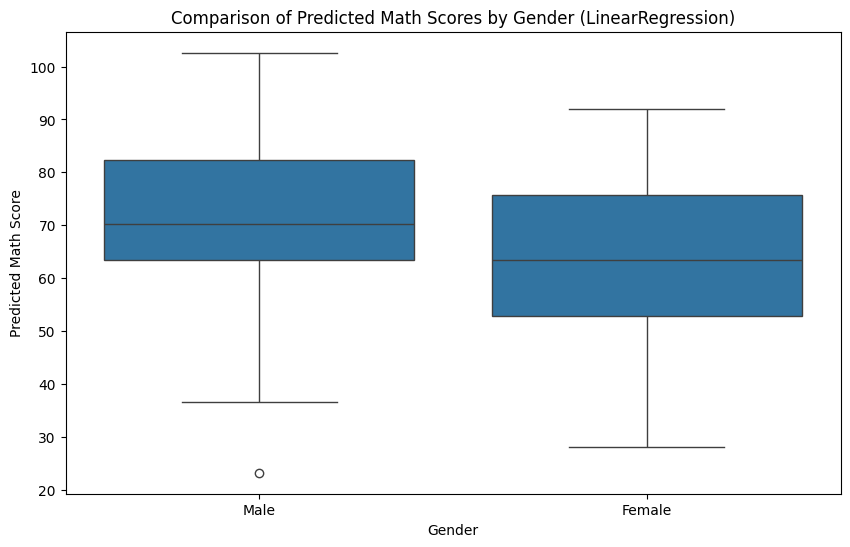

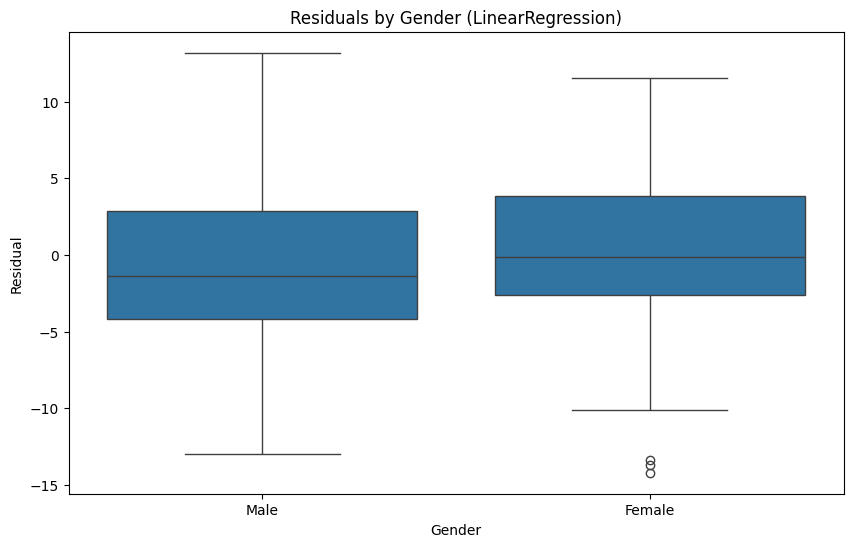

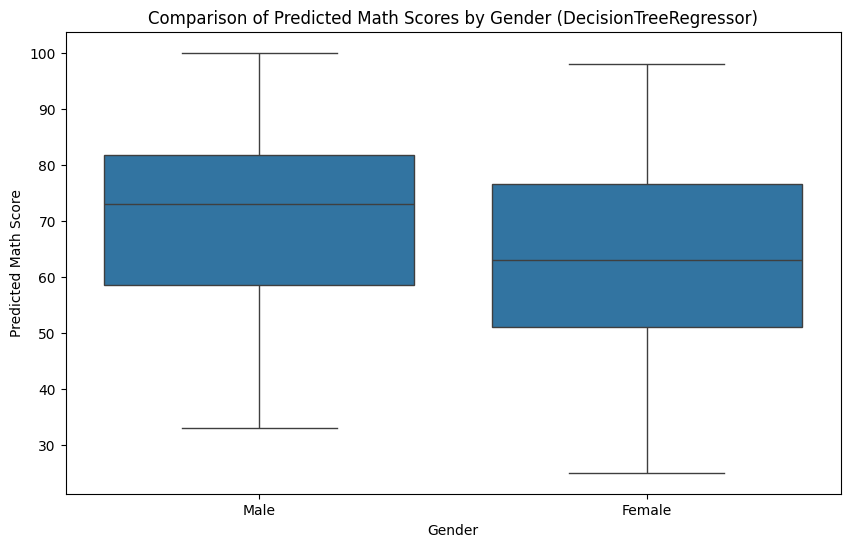

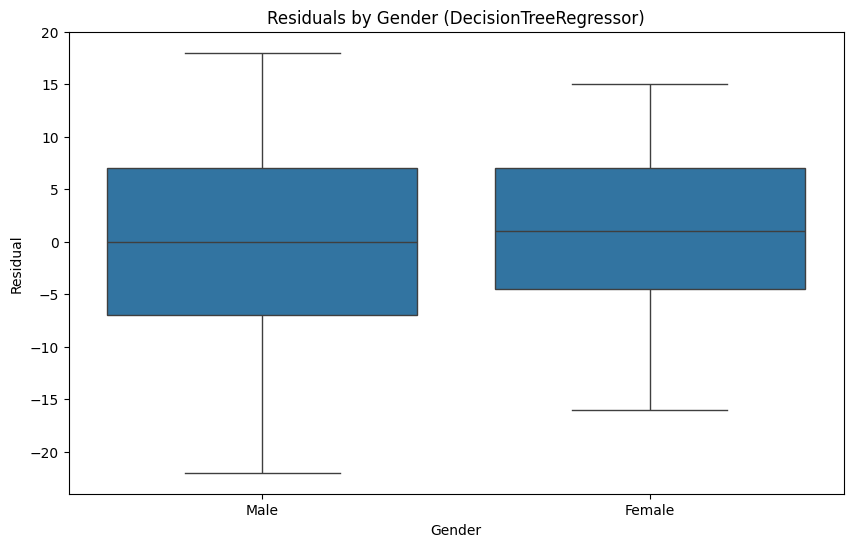

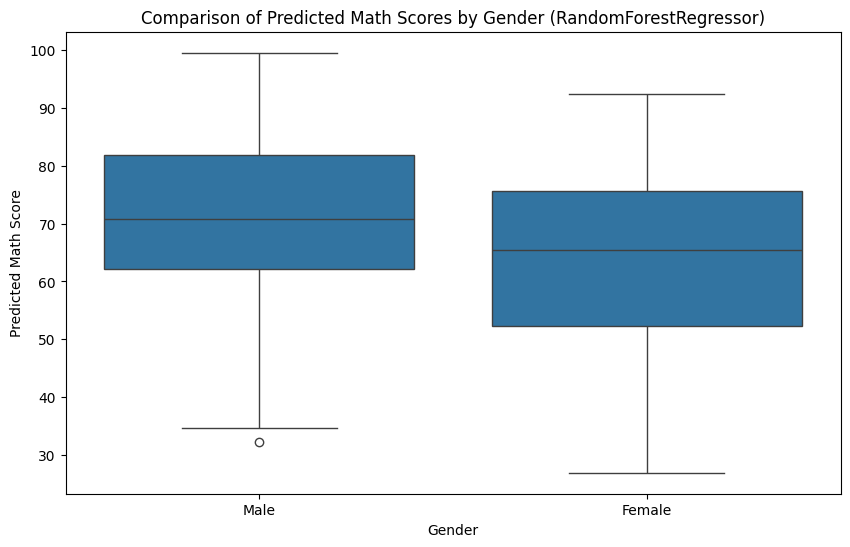

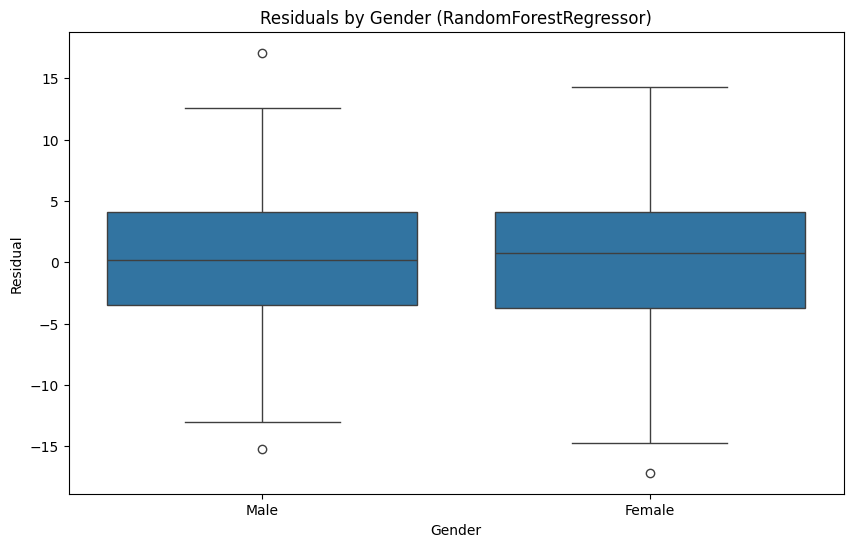

In [84]:
# Split the male dataset into training and testing sets
x_male_train, x_male_test, y_male_train, y_male_test = train_test_split(x_male, y_male, test_size=0.2, random_state=42)

# Split the female dataset into training and testing sets
x_female_train, x_female_test, y_female_train, y_female_test = train_test_split(x_female, y_female, test_size=0.2, random_state=42)

for name, model in models.items():
  # Train and evaluate the model for males
  pred_male, residuals_male = BuiltModel(model, x_male_train, x_male_test, y_male_train, y_male_test)

  # Train and evaluate the model for females
  pred_female, residuals_female = BuiltModel(model, x_female_train, x_female_test, y_female_train, y_female_test)

  results_male = pd.DataFrame({
      'Gender': 'Male',
      'Actual Math Score': y_male_test,
      'Predicted Math Score': pred_male,
      'Residual': residuals_male
  })

  results_female = pd.DataFrame({
      'Gender': 'Female',
      'Actual Math Score': y_female_test,
      'Predicted Math Score': pred_female,
      'Residual': residuals_female
  })

  # Combine results into a single DataFrame
  results_residuals = pd.concat([results_male, results_female], ignore_index=True)

  # Create a DataFrame for the predictions
  results_prediction = pd.DataFrame({
      'Gender': ['Male'] * len(pred_male) + ['Female'] * len(pred_female),
      'Predicted Math Score': np.concatenate([pred_male, pred_female]),
      #'Residual Math Score': list(residuals_males[:, 0]) + list(residuals_females[:, 0]),

  })

  # Plotting the boxplot
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Gender', y='Predicted Math Score', data=results_prediction)
  plt.title(f'Comparison of Predicted Math Scores by Gender ({name})')
  plt.show()

  # Boxplot of residuals by gender
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Gender', y='Residual', data=results_residuals)
  plt.title(f'Residuals by Gender ({name})')
